In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

#matplotlib inline

In [3]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')

In [4]:
df.head(20)

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0   1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1   1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2   1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3   1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4   1325318160   NaN   NaN   NaN    NaN           NaN                NaN   
5   1325318220   NaN   NaN   NaN    NaN           NaN                NaN   
6   1325318280   NaN   NaN   NaN    NaN           NaN                NaN   
7   1325318340   NaN   NaN   NaN    NaN           NaN                NaN   
8   1325318400   NaN   NaN   NaN    NaN           NaN                NaN   
9   1325318460   NaN   NaN   NaN    NaN           NaN                NaN   
10  1325318520   NaN   NaN   NaN    NaN           NaN                NaN   
11  1325318580   NaN   NaN   NaN    NaN           NaN                NaN   
12  1325318640   NaN   NaN   NaN    NaN           NaN                NaN   
13  1325318700   NaN   NaN   NaN    NaN           NaN                NaN   
14  1325318760   NaN   NaN   NaN    NaN           NaN                NaN   
15  1325318820   NaN   NaN   NaN    NaN           NaN                NaN   
16  1325318880   NaN   NaN   NaN    NaN           NaN                NaN   
17  1325318940   NaN   NaN   NaN    NaN           NaN                NaN   
18  1325319000   NaN   NaN   NaN    NaN           NaN                NaN   
19  1325319060   NaN   NaN   NaN    NaN           NaN                NaN   

    Weighted_Price  
0             4.39  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN  
10             NaN  
11             NaN  
12             NaN  
13             NaN  
14             NaN  
15             NaN  
16             NaN  
17             NaN  
18             NaN  
19             NaN

In [7]:
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]

In [8]:
df.head(10)

Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00   NaN   NaN   NaN    NaN           NaN   
2 2011-12-31 13:24:00   NaN   NaN   NaN    NaN           NaN   
3 2011-12-31 13:25:00   NaN   NaN   NaN    NaN           NaN   
4 2011-12-31 13:26:00   NaN   NaN   NaN    NaN           NaN   
5 2011-12-31 13:27:00   NaN   NaN   NaN    NaN           NaN   
6 2011-12-31 13:28:00   NaN   NaN   NaN    NaN           NaN   
7 2011-12-31 13:29:00   NaN   NaN   NaN    NaN           NaN   
8 2011-12-31 13:30:00   NaN   NaN   NaN    NaN           NaN   
9 2011-12-31 13:31:00   NaN   NaN   NaN    NaN           NaN   

   Volume_(Currency)  Weighted_Price  
0                2.0            4.39  
1                NaN             NaN  
2                NaN             NaN  
3                NaN             NaN  
4                NaN             NaN  
5                NaN             NaN  
6                NaN             NaN  
7                NaN             NaN  
8                NaN             NaN  
9                NaN             NaN

## Handling missing value

In [ ]:
#checking for nulls
df.isnull().sum()

In [16]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [ ]:
fill_missing(df)

# Feature extraction

In [ ]:
#changing timeframe to 1 hour intervals
df_resample = df.resample("24H").mean()

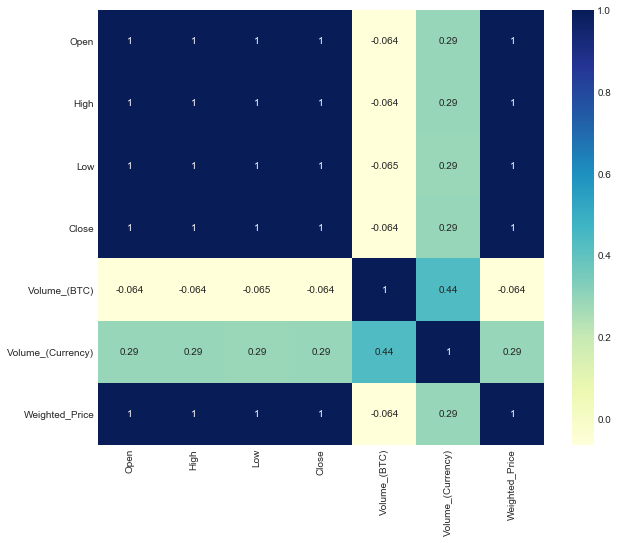

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_resample.corr(),annot=True,cmap="YlGnBu")

In [ ]:
df = bitstamp_daily.set_index("Timestamp")

In [ ]:
df["month"] = df.Timestamp.dt.month
#df["week"] = df.Timestamp.dt.week
df["day"] = df.Timestamp.dt.day
#df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

In [ ]:
features = ['Open','Close','High', 'Low', 'Volume_BTC', 'Volume_Currency','month', 'day']
label = 'Weighted_Price'

## Model Building

## Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_resample[features],
    df_resample[label],
    test_size = 0.3
)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
regression_model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import r2_score
predictions = regression_model.predict(X_test)
print('Accuracy of model : ', regression_model.score(X_test, y_test))
print('r2 Score : ', r2_score(predictions, y_test))

## XG boost

In [ ]:
df_train = df_resample[df_resample.Timestamp < "2020"]
df_valid = df_resample[df_resample.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

In [ ]:
X_train, y_train = df_train[features], df_train.Weighted_Price
X_test, y_test = df_valid[features], df_valid.Weighted_Price

In [ ]:
reg = xgb.XGBRegressor()

In [ ]:
## Hyper Parameter Optimization Grid

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],  
 
}

In [ ]:
model  = RandomizedSearchCV(    
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print(f"Model Best Score : {model.best_score_}")
print(f"Model Best Parameters : {model.best_estimator_.get_params()}")

In [ ]:
model.best_estimator_